In [ ]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

import seaborn as sns
import matplotlib.pyplot as plt

# 0. Flattern JSON fileds in some columns


**NOTE: There are multiple columns which contain JSON blobs of varying depth, we are using the referenced code to transfer these columns into the regular format**

Reference: https://www.kaggle.com/code/julian3833/1-quick-start-read-csv-and-flatten-json-fields

In [ ]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

def load_df(csv_path='/Users/xinyuliu/Downloads/ga-customer-revenue-prediction/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

print(os.listdir("/Users/xinyuliu/Downloads/ga-customer-revenue-prediction"))

['.DS_Store', 'test.csv', 'train.csv', 'sample_submission.csv']


In [ ]:
%%time
df_train = load_df()
df_test = load_df("/Users/xinyuliu/Downloads/ga-customer-revenue-prediction/test.csv")

<ipython-input-2-7a3cfd0e1c12>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  column_as_df = json_normalize(df[column])


Loaded train.csv. Shape: (1708337, 60)
Loaded test.csv. Shape: (401589, 59)
CPU times: user 8min 24s, sys: 13min 27s, total: 21min 51s
Wall time: 31min 8s


In [ ]:
%%time
df_train.to_csv("train-flattened.csv", index=False)
df_test.to_csv("test-flattened.csv", index=False)

NameError: name 'df_train' is not defined

In [ ]:
%%time
train = pd.read_csv("train-flattened.csv")
test = pd.read_csv("test-flattened.csv")

<decorator-gen-54>:2: DtypeWarning: Columns (3,59) have mixed types.Specify dtype option on import or set low_memory=False.
<decorator-gen-54>:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 3min 26s, sys: 52.1 s, total: 4min 18s
Wall time: 5min 6s


# 1. EDA

In [ ]:
pd.set_option('display.max_columns', None)
train_copy = train.copy()
train_copy.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.sessionQualityDim,totals.timeOnSite,totals.transactions,totals.transactionRevenue,totals.totalTransactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adContent,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.campaignCode
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Western Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,(not set),google,organic,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Cupertino,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,2,2.0,NaN,NaN,2.0,28.0,NaN,NaN,NaN,(not set),sites.google.com,referral,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo

In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 60 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   channelGrouping                                    object 
 1   customDimensions                                   object 
 2   date                                               int64  
 3   fullVisitorId                                      object 
 4   hits                                               object 
 5   socialEngagementType                               object 
 6   visitId                                            int64  
 7   visitNumber                                        int64  
 8   visitStartTime                                     int64  
 9   device.browser                                     object 
 10  device.browserVersion                              object 
 11  device.browserSize                                

## 1.1 Deal with date, duplicated, missing, and constant values

In [ ]:
nullval = train_copy.isnull().sum().sort_values(ascending=False).to_frame().reset_index()
nullval.columns=['column_name','NULL amount']
nullval = nullval[nullval['NULL amount']!=0]
nullval['NULL percent'] = nullval['NULL amount']/len(train_copy)

In [ ]:
nullval

,column_name,NULL amount,NULL percent
0,trafficSource.campaignCode,1708336,0.999999
1,totals.totalTransactionRevenue,1689823,0.989163
2,totals.transactionRevenue,1689823,0.989163
3,totals.transactions,1689778,0.989136
4,trafficSource.adContent,1643600,0.962105
5,trafficSource.adwordsClickInfo.adNetworkType,1633063,0.955937
6,trafficSource.adwordsClickInfo.slot,1633063,0.955937
7,trafficSource.adwordsClickInfo.page,1633063,0.955937
8,trafficSource.adwordsClickInfo.isVideoAd,1633063,0.955937
9,trafficSource.adwordsClickInfo.gclId,1632914,0.955850


In [ ]:
# drop columns contained more than 60% null values
to_drop_null=['trafficSource.campaignCode',
 'trafficSource.adContent',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.page',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.isTrueDirect',
 'trafficSource.referralPath',
 'trafficSource.keyword',
 'totals.sessionQualityDim']
train_copy.drop(to_drop_null, axis=1, inplace=True)

In [ ]:
# fillna saved numeric columns
train_copy['totals.pageviews'].fillna(1,inplace=True)
train_copy['totals.newVisits'].fillna(0,inplace=True)
train_copy['totals.totalTransactionRevenue'].fillna(0.0, inplace=True)
train_copy['totals.transactionRevenue'].fillna(0.0, inplace=True)
train_copy['totals.transactions'].fillna(0.0, inplace=True)
train_copy['totals.timeOnSite'].fillna(0.0, inplace=True)
train_copy['totals.bounces'].fillna(0.0, inplace=True)

train_copy['totals.pageviews']=train_copy['totals.pageviews'].astype(int)
train_copy['totals.newVisits']=train_copy['totals.newVisits'].astype(int)
train_copy['totals.transactionRevenue']=train_copy['totals.transactionRevenue'].astype(float)
train_copy['totals.totalTransactionRevenue']=train_copy['totals.totalTransactionRevenue'].astype(float)
train_copy['totals.transactions']=train_copy['totals.transactions'].astype(float)
train_copy['totals.timeOnSite']=train_copy['totals.timeOnSite'].astype(float)
train_copy['totals.bounces']=train_copy['totals.bounces'].astype(float)

In [ ]:
# drop columns with constant values
to_drop_constant = [col for col in train_copy.columns if train_copy[col].nunique()==1]
train_copy.drop(to_drop_constant, axis=1, inplace=True)

In [ ]:
# drop duplcaited rows
train_copy.drop_duplicates(inplace=True)

In [ ]:
# convert date column to DATE format
from datetime import datetime
train_copy['date']=pd.to_datetime(train_copy['date'],format='%Y%m%d')

In [ ]:
# drop columns not helping much on predictinng revenue
to_drop = ['visitId','totals.totalTransactionRevenue','customDimensions','date','visitStartTime','device.isMobile',
          'geoNetwork.subContinent','hits']
train_copy.drop(to_drop, axis=1, inplace=True)

In [ ]:
train_copy.columns

Index(['channelGrouping', 'fullVisitorId', 'visitNumber', 'device.browser',
       'device.operatingSystem', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.timeOnSite', 'totals.transactions', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium'],
      dtype='object')

In [ ]:
train_copy['revenue_generation_status']=train_copy['totals.transactions'].apply(lambda x: 1 if x>0 else 0)

# 2. EDA

## 2.1 Total Transaction Revenue

In [ ]:
train_copy['totals.transactionRevenue'].value_counts()

0.000000e+00    1689823
1.699000e+07        308
1.999000e+07        248
3.998000e+07        220
1.899000e+07        219
                 ...   
4.041000e+08          1
2.524000e+07          1
1.399600e+08          1
6.459950e+09          1
5.368200e+08          1
Name: totals.transactionRevenue, Length: 7252, dtype: int64

In [ ]:
pd.read_csv('sample_submission.csv')

/Users/xinyuliu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fullVisitorId,PredictedLogRevenue
0,0000018966949534117,0.0
1,0000039738481224681,0.0
2,0000073585230191399,0.0
3,0000087588448856385,0.0
4,0000149787903119437,0.0
...,...,...
296525,9999862054614696520,0.0
296526,9999898168621645223,0.0
296527,999990167740728398,0.0
296528,9999915620249883537,0.0


Text(0.5, 1.0, 'Distribution of Revenue')

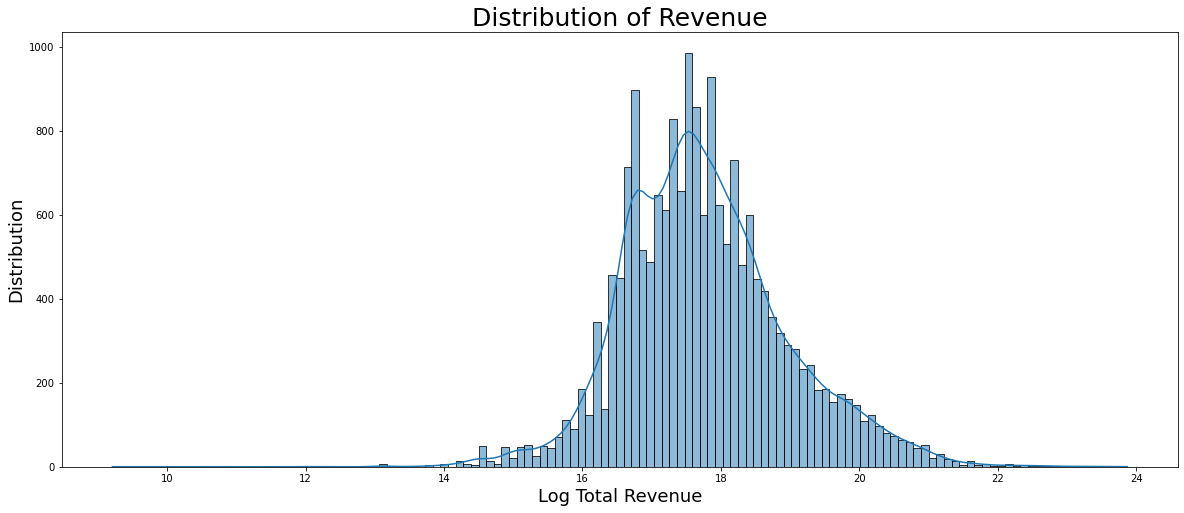

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

real_revenue = train_copy[train_copy['totals.transactionRevenue']>0]['totals.transactionRevenue']
plt.figure(figsize=(20,8))
ax1 = sns.histplot(np.log(real_revenue),kde=True)
ax1.set_xlabel('Log Total Revenue',fontsize=18)
ax1.set_ylabel('Distribution',fontsize=18)
plt.title('Distribution of Revenue',fontsize=25)

Text(0.5, 1.0, 'Percentage of Transactions Generating Revenue')

<Figure size 1440x1440 with 0 Axes>

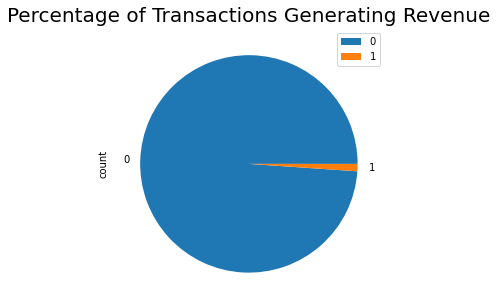

In [ ]:
# percentage of transactions generated revenue
train_copy['revenue_generation_status']=train_copy['totals.transactions'].apply(lambda x: 1 if x>0 else 0)
revenue_generation_status = train_copy['revenue_generation_status'].value_counts().to_frame().\
                            reset_index().rename(columns={'index':'revenue_generation_status','revenue_generation_status':'count'})

plt.figure(figsize=(20,20))
revenue_generation_status.plot.pie(y = 'count',figsize=(5, 5))
plt.title('Percentage of Transactions Generating Revenue',fontsize=20)

In [ ]:
revenue_generation_status

,revenue_generation_status,count
0,0,1689778
1,1,18559


## 2.2 Revenue vs Device Browser

In [ ]:
# total browser amounts
m = train_copy['device.browser'].value_counts()
m[m>1]

Chrome                      1173056
Safari                       312165
Firefox                       63845
Internet Explorer             35474
Android Webview               34266
Edge                          20543
Samsung Internet              15792
Opera Mini                    15018
Safari (in-app)               14207
Opera                          9585
UC Browser                     5313
YaBrowser                      3045
Amazon Silk                    1467
Coc Coc                        1242
Android Browser                 941
Mozilla Compatible Agent        663
MRCHROME                        308
Maxthon                         287
Puffin                          251
BlackBerry                      243
Nintendo Browser                165
Nokia Browser                    96
Iron                             40
osee2unifiedRelease              27
SeaMonkey                        26
Mozilla                          22
LYF_LS_4002_12                   21
Seznam                      

In [ ]:
device = train_copy[['device.browser','totals.transactionRevenue','totals.transactions']].\
groupby(['device.browser']).agg(['sum']).reset_index()
device.columns=['device browser','transaction revenue','transaction amount']
device['average transaction revenue']=device['transaction revenue']/device['transaction amount']


In [ ]:
device.sort_values(by='average transaction revenue',ascending=False)[:10]

,device browser,transaction revenue,transaction amount,average transaction revenue
43,Firefox,1.502462e+11,365.0,4.116336e+08
35,Chrome,2.068165e+12,17467.0,1.184041e+08
42,Edge,8.067300e+09,76.0,1.061487e+08
47,Internet Explorer,1.195796e+10,153.0,7.815660e+07
72,Safari,7.670099e+10,1221.0,6.281817e+07
66,Opera,5.947700e+08,16.0,3.717312e+07
24,Amazon Silk,2.999000e+07,1.0,2.999000e+07
74,Samsung Internet,2.208500e+08,8.0,2.760625e+07
82,YaBrowser,2.199000e+07,1.0,2.199000e+07
28,Android Webview,1.861100e+08,10.0,1.861100e+07


In [ ]:
device.sort_values(by='transaction revenue',ascending=False)[:10]

,device browser,transaction revenue,transaction amount,average transaction revenue
35,Chrome,2.068165e+12,17467.0,1.184041e+08
43,Firefox,1.502462e+11,365.0,4.116336e+08
72,Safari,7.670099e+10,1221.0,6.281817e+07
47,Internet Explorer,1.195796e+10,153.0,7.815660e+07
42,Edge,8.067300e+09,76.0,1.061487e+08
66,Opera,5.947700e+08,16.0,3.717312e+07
74,Samsung Internet,2.208500e+08,8.0,2.760625e+07
28,Android Webview,1.861100e+08,10.0,1.861100e+07
73,Safari (in-app),1.537700e+08,12.0,1.281417e+07
24,Amazon Silk,2.999000e+07,1.0,2.999000e+07


In [ ]:
device.sort_values(by='transaction amount',ascending=False)[:10]

,device browser,transaction revenue,transaction amount,average transaction revenue
35,Chrome,2.068165e+12,17467.0,1.184041e+08
72,Safari,7.670099e+10,1221.0,6.281817e+07
43,Firefox,1.502462e+11,365.0,4.116336e+08
47,Internet Explorer,1.195796e+10,153.0,7.815660e+07
42,Edge,8.067300e+09,76.0,1.061487e+08
66,Opera,5.947700e+08,16.0,3.717312e+07
73,Safari (in-app),1.537700e+08,12.0,1.281417e+07
28,Android Webview,1.861100e+08,10.0,1.861100e+07
74,Samsung Internet,2.208500e+08,8.0,2.760625e+07
24,Amazon Silk,2.999000e+07,1.0,2.999000e+07


Text(0, 0.5, 'Transaction amount')

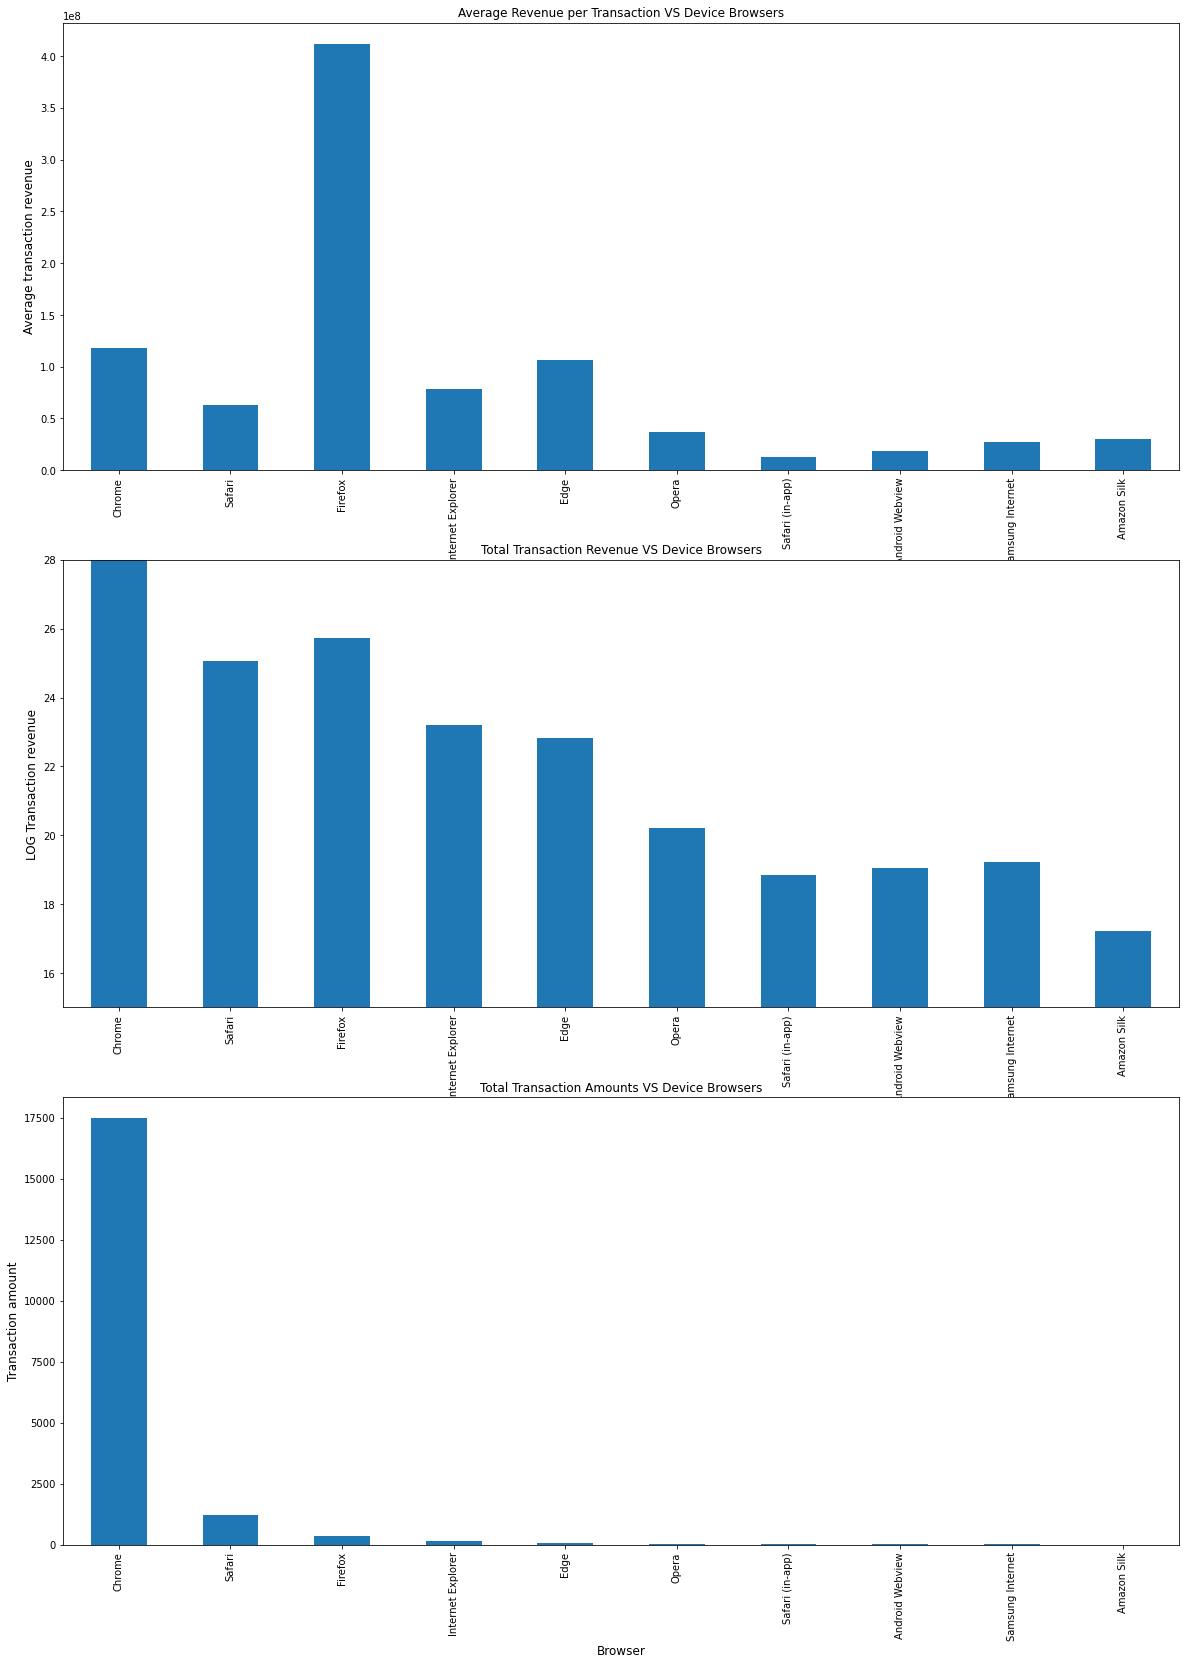

In [ ]:
m = device.sort_values(by='transaction amount',ascending=False)[:10]
plt.subplots(figsize=(20,28))

plt.subplot(3,1,1)
m.set_index('device browser')['average transaction revenue'].plot(kind='bar')
plt.title('Average Revenue per Transaction VS Device Browsers')
plt.xlabel('Browser',fontsize=12)
plt.ylabel('Average transaction revenue',fontsize=12)

plt.subplot(3,1,2)
np.log(m.set_index('device browser')['transaction revenue']).plot(kind='bar')
plt.ylim(15,28)
plt.title('Total Transaction Revenue VS Device Browsers')
plt.xlabel('Browser',fontsize=12)
plt.ylabel('LOG Transaction revenue',fontsize=12)

plt.subplot(3,1,3)
m.set_index('device browser')['transaction amount'].plot(kind='bar')
plt.title('Total Transaction Amounts VS Device Browsers')
plt.xlabel('Browser',fontsize=12)
plt.ylabel('Transaction amount',fontsize=12)

From the above 3 tables and graphs: 

Chrome generates highest transaction revenue with most transactions

Firefox generates highest avg rev per transaction

## 2.3 Revenue VS Operating System

In [ ]:
# total operating systems
m = train_copy['device.operatingSystem'].value_counts()
m[m>1]

Windows             619720
Macintosh           438514
Android             299386
iOS                 219334
Linux                63971
Chrome OS            51318
(not set)            11815
Windows Phone         1675
Samsung                911
Tizen                  709
BlackBerry             350
OS/2                   199
Xbox                   133
Nintendo Wii           100
Firefox OS              97
Nintendo WiiU           51
FreeBSD                 18
Playstation Vita        15
Nintendo 3DS             9
SunOS                    3
OpenBSD                  3
Nokia                    3
SymbianOS                2
Name: device.operatingSystem, dtype: int64

In [ ]:
OS = train_copy[['device.operatingSystem','totals.transactionRevenue','totals.transactions']].\
groupby(['device.operatingSystem']).agg(['sum']).reset_index()
OS.columns=['operating system','transaction revenue','transaction amount']
OS['average transaction revenue']=OS['transaction revenue']/OS['transaction amount']

In [ ]:
OS.sort_values(by='average transaction revenue',ascending=False)[:6]

,operating system,transaction revenue,transaction amount,average transaction revenue
3,Chrome OS,2.696522e+11,1770.0,1.523459e+08
20,Windows,5.750670e+11,3852.0,1.492905e+08
7,Macintosh,1.315231e+12,10772.0,1.220972e+08
1,Android,5.023006e+10,776.0,6.472946e+07
6,Linux,7.025809e+10,1324.0,5.306502e+07
23,iOS,3.588012e+10,835.0,4.297020e+07


In [ ]:
OS.sort_values(by='transaction revenue',ascending=False)[:6]

,operating system,transaction revenue,transaction amount,average transaction revenue
7,Macintosh,1.315231e+12,10772.0,1.220972e+08
20,Windows,5.750670e+11,3852.0,1.492905e+08
3,Chrome OS,2.696522e+11,1770.0,1.523459e+08
6,Linux,7.025809e+10,1324.0,5.306502e+07
1,Android,5.023006e+10,776.0,6.472946e+07
23,iOS,3.588012e+10,835.0,4.297020e+07


In [ ]:
OS.sort_values(by='transaction amount',ascending=False)[:6]

,operating system,transaction revenue,transaction amount,average transaction revenue
7,Macintosh,1.315231e+12,10772.0,1.220972e+08
20,Windows,5.750670e+11,3852.0,1.492905e+08
3,Chrome OS,2.696522e+11,1770.0,1.523459e+08
6,Linux,7.025809e+10,1324.0,5.306502e+07
23,iOS,3.588012e+10,835.0,4.297020e+07
1,Android,5.023006e+10,776.0,6.472946e+07


/Users/xinyuliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Transaction amount')

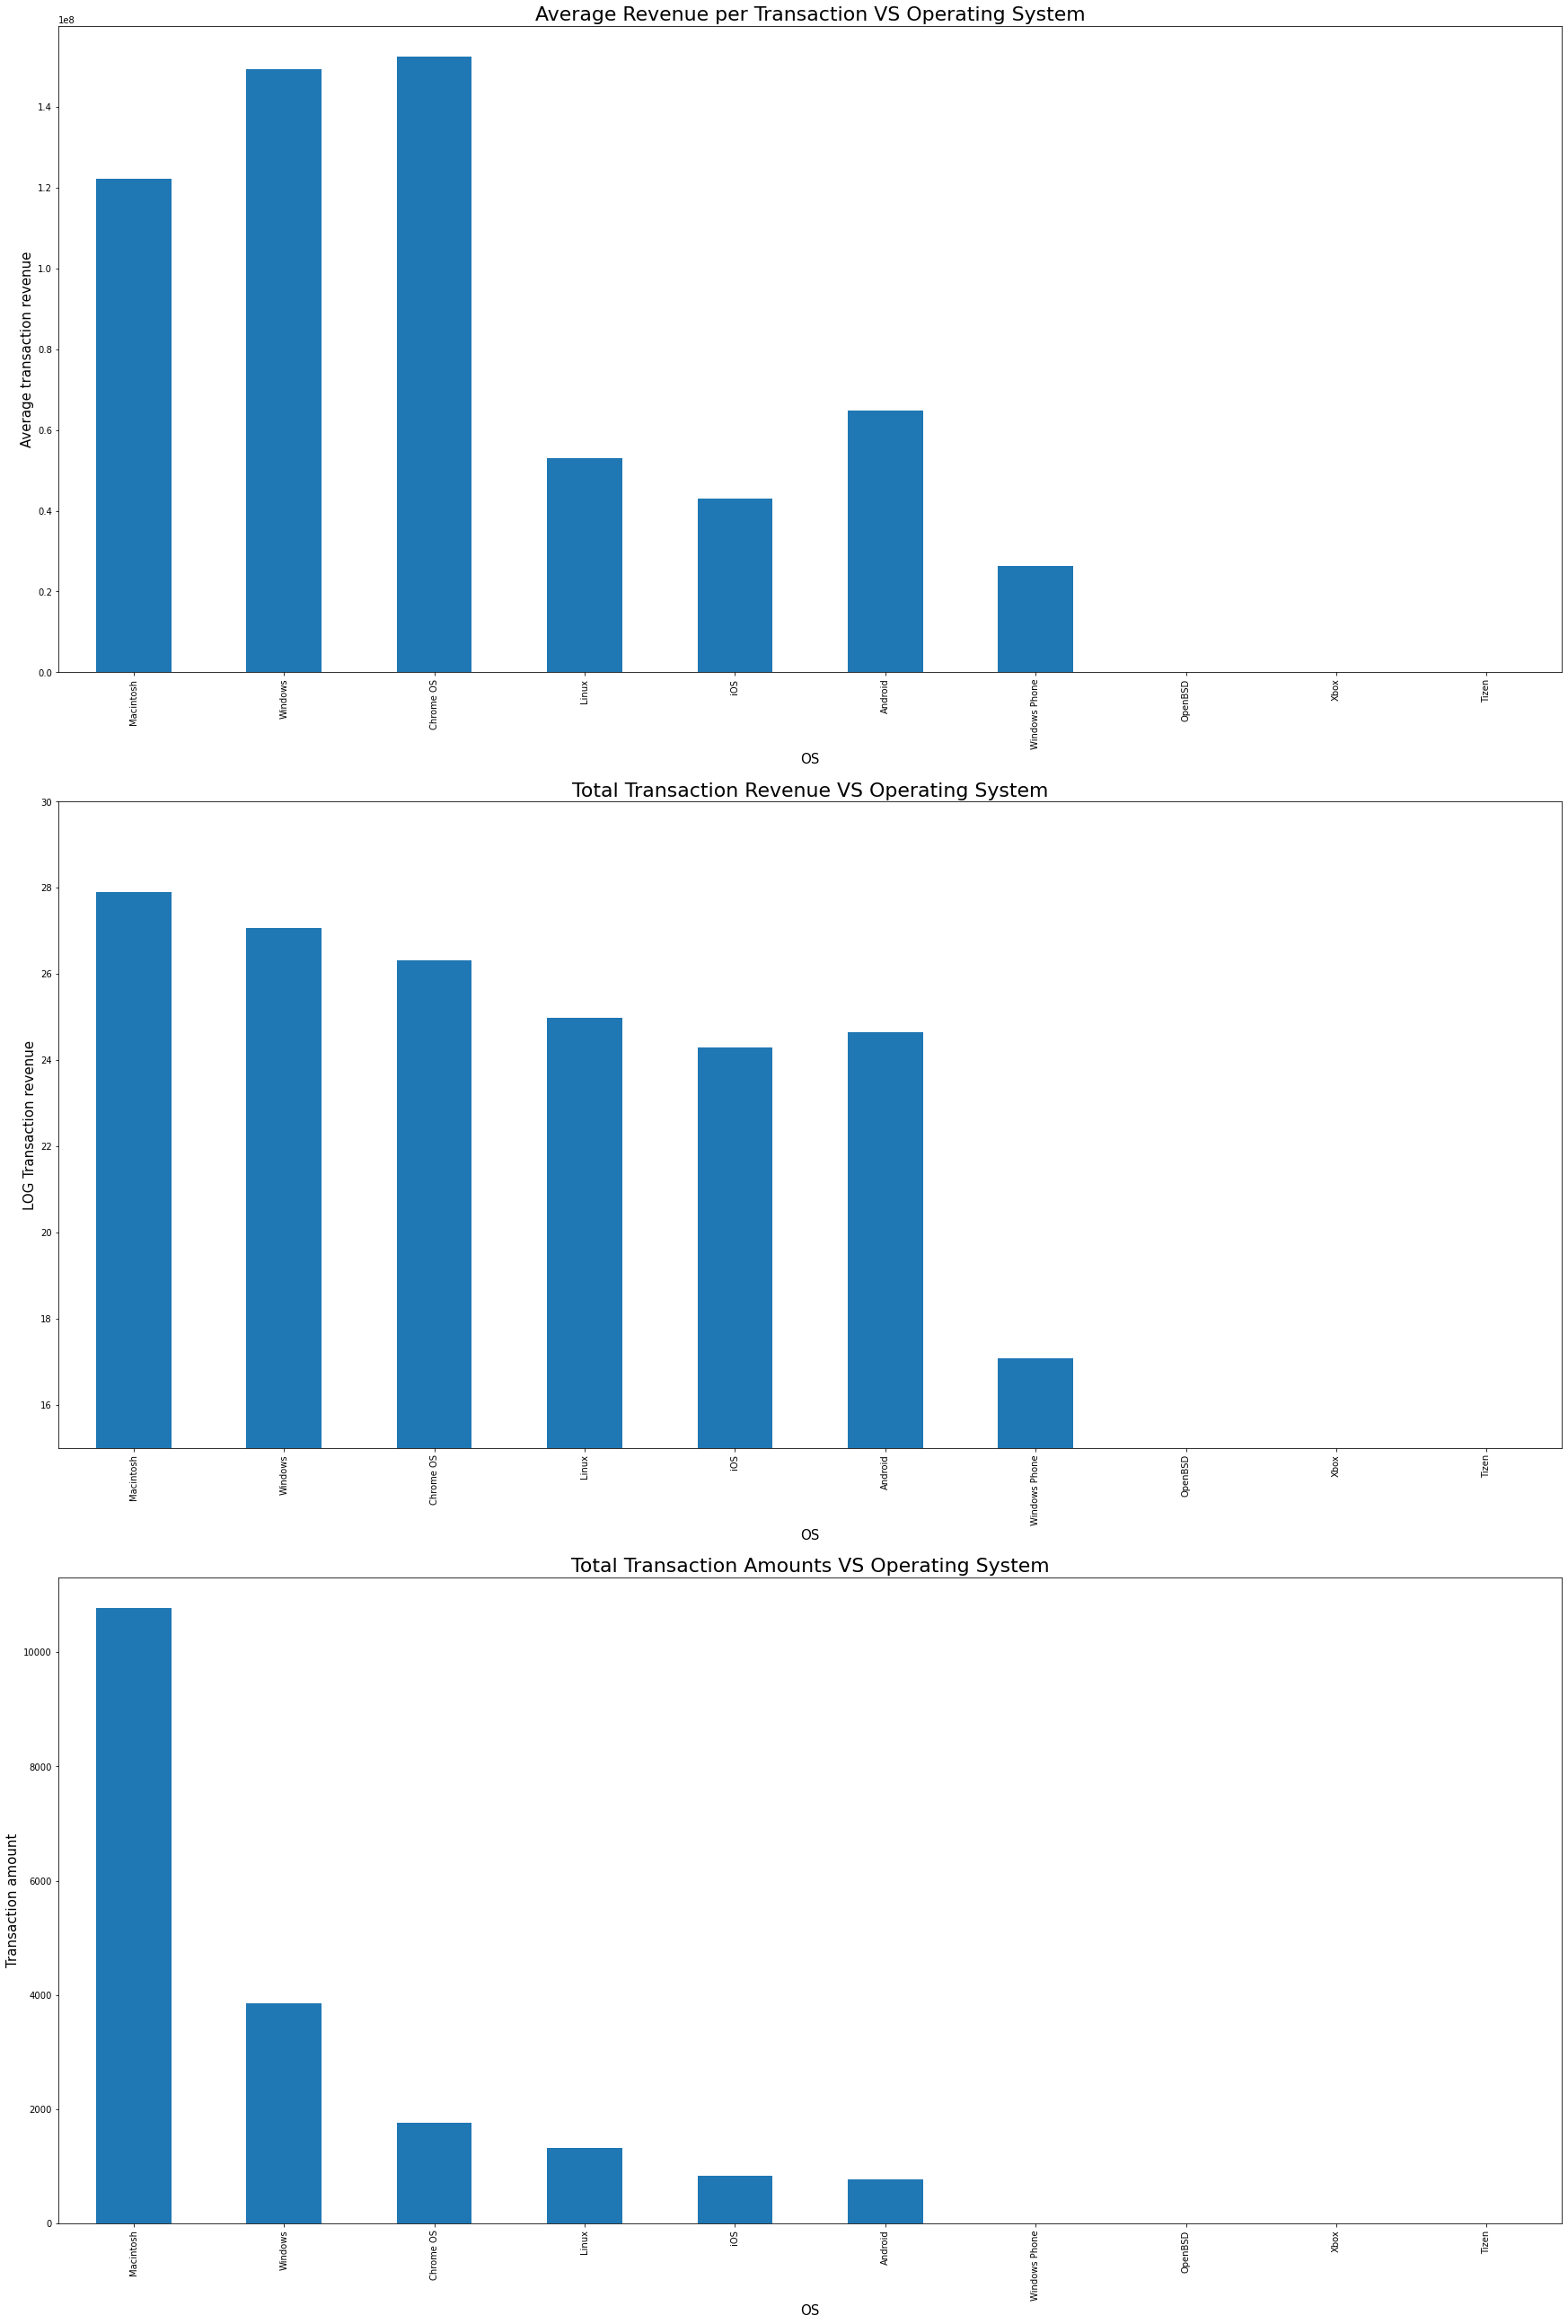

In [ ]:
m = OS.sort_values(by='transaction amount',ascending=False)[:10]
plt.subplots(figsize=(30,45))

plt.subplot(3,1,1)
m.set_index('operating system')['average transaction revenue'].plot(kind='bar')
plt.title('Average Revenue per Transaction VS Operating System',fontsize=22)
plt.xlabel('OS',fontsize=15)
plt.ylabel('Average transaction revenue',fontsize=15)

plt.subplot(3,1,2)
np.log(m.set_index('operating system')['transaction revenue']).plot(kind='bar')
plt.ylim(15,30)
plt.title('Total Transaction Revenue VS Operating System',fontsize=22)
plt.xlabel('OS',fontsize=15)
plt.ylabel('LOG Transaction revenue',fontsize=15)

plt.subplot(3,1,3)
m.set_index('operating system')['transaction amount'].plot(kind='bar')
plt.title('Total Transaction Amounts VS Operating System',fontsize=22)
plt.xlabel('OS',fontsize=15)
plt.ylabel('Transaction amount',fontsize=15)

## 2.4 Revenue vs time using date

In [ ]:
time = train_copy[['date','totals.transactionRevenue','totals.transactions']].\
groupby(['date']).agg(['sum']).reset_index()
time.columns=['date','transaction revenue','transaction amount']
time['average transaction revenue']=time['transaction revenue']/time['transaction amount']

In [ ]:
time

,date,transaction revenue,transaction amount,average transaction revenue
0,2016-08-01,6.116060e+09,34.0,1.798841e+08
1,2016-08-02,1.361190e+09,18.0,7.562167e+07
2,2016-08-03,0.000000e+00,0.0,NaN
3,2016-08-04,1.182890e+09,17.0,6.958176e+07
4,2016-08-05,5.594260e+09,42.0,1.331967e+08
...,...,...,...,...
633,2018-04-26,3.112580e+09,32.0,9.726812e+07
634,2018-04-27,2.415980e+09,18.0,1.342211e+08
635,2018-04-28,3.872800e+08,8.0,4.841000e+07
636,2018-04-29,1.269130e+09,14.0,9.065214e+07


/Users/xinyuliu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'LOG revenue per transaction')

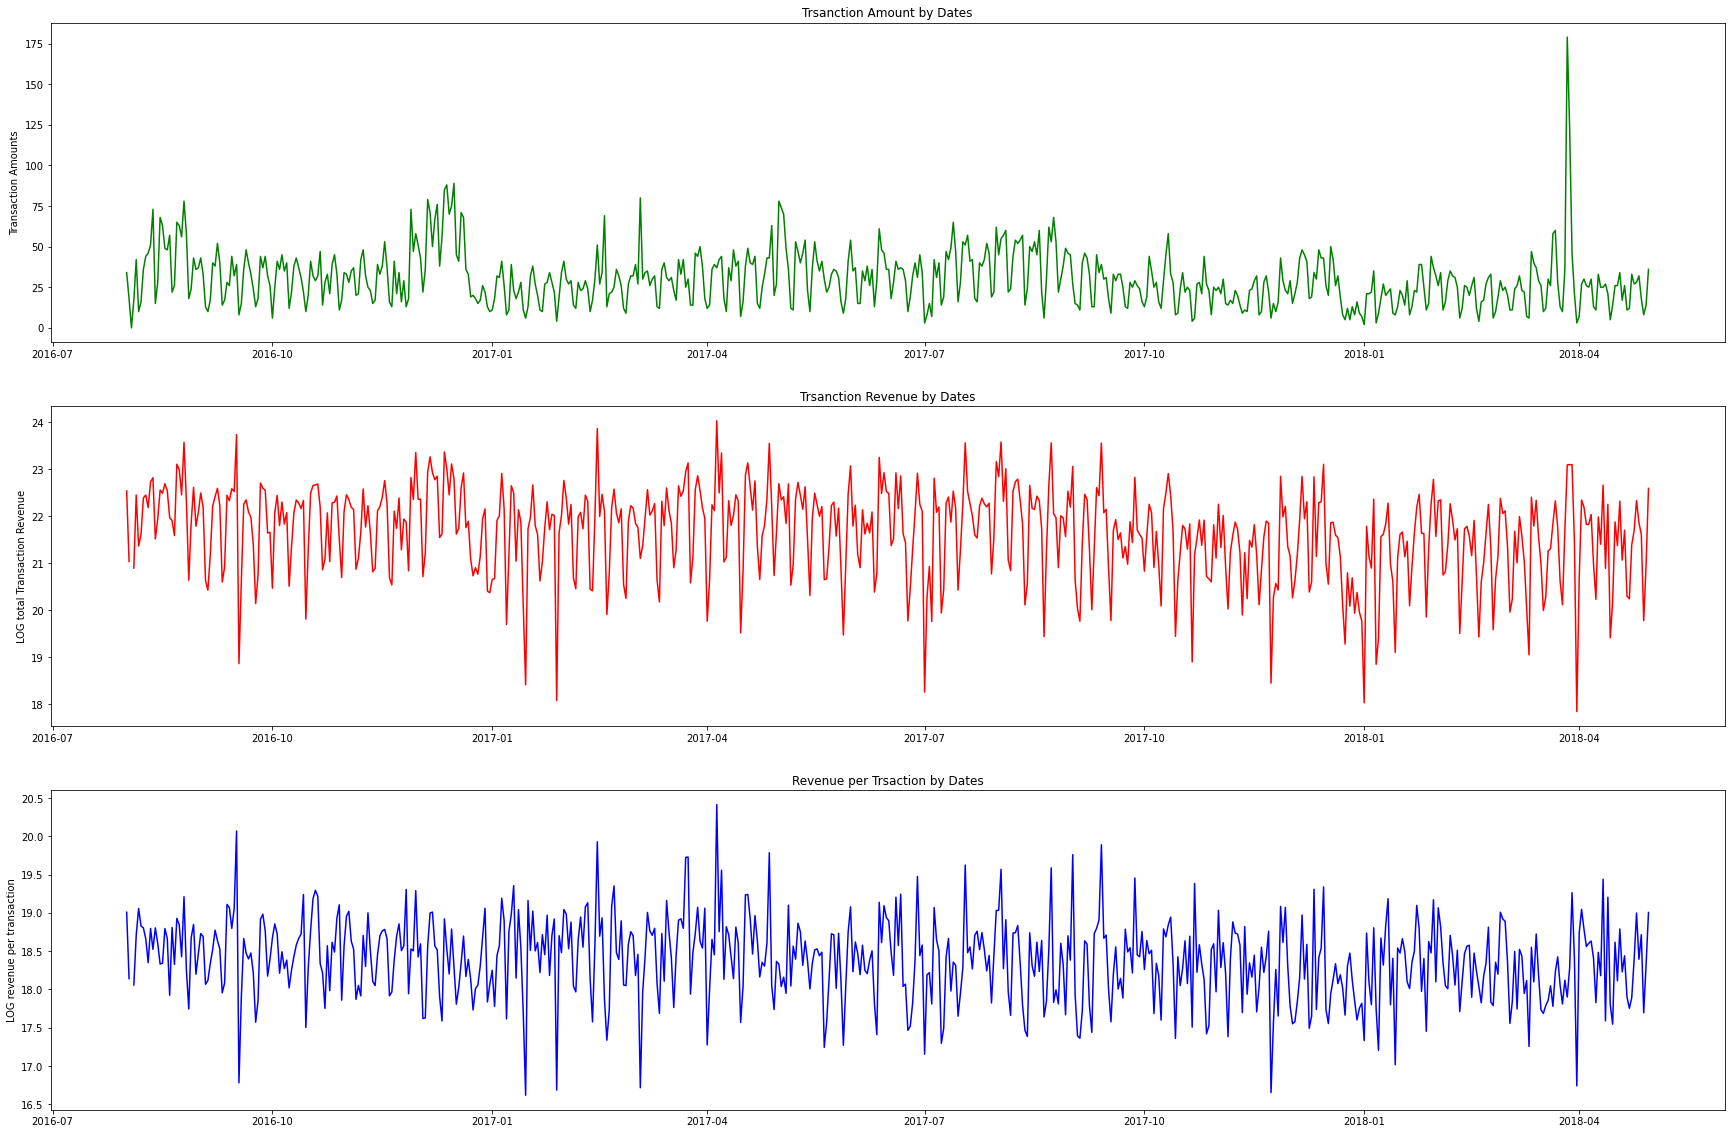

In [ ]:
plt.subplots(figsize=(30,20))

plt.subplot(3,1,1)
plt.plot(time['date'],time['transaction amount'],color='g')
plt.title('Trsanction Amount by Dates')
plt.ylabel('Transaction Amounts')

plt.subplot(3,1,2)
plt.plot(time['date'],np.log(time['transaction revenue']),color='r')
plt.title('Trsanction Revenue by Dates')
plt.ylabel('LOG total Transaction Revenue')

plt.subplot(3,1,3)
plt.plot(time['date'],np.log(time['average transaction revenue']),color='b')
plt.title('Revenue per Trsaction by Dates')
plt.ylabel('LOG revenue per transaction')

## 2.5 Revenue vs Channel groups

In [ ]:
channel = train_copy[['channelGrouping','totals.transactionRevenue','totals.transactions']].\
groupby(['channelGrouping']).agg(['sum']).reset_index()
channel.columns=['channelGrouping','transaction revenue','transaction amount']
channel['average transaction revenue']=channel['transaction revenue']/channel['transaction amount']

In [ ]:
channel.sort_values(by='average transaction revenue',ascending=False)

,channelGrouping,transaction revenue,transaction amount,average transaction revenue
3,Display,1.082893e+11,218.0,4.967397e+08
2,Direct,5.973243e+11,3540.0,1.687357e+08
6,Referral,9.960210e+11,8930.0,1.115365e+08
4,Organic Search,5.394990e+11,5709.0,9.449973e+07
5,Paid Search,6.696862e+10,726.0,9.224328e+07
1,Affiliates,8.650700e+08,17.0,5.088647e+07
7,Social,7.367770e+09,189.0,3.898291e+07
0,(Other),9.990000e+06,1.0,9.990000e+06


In [ ]:
channel.sort_values(by='transaction amount',ascending=False)

,channelGrouping,transaction revenue,transaction amount,average transaction revenue
6,Referral,9.960210e+11,8930.0,1.115365e+08
4,Organic Search,5.394990e+11,5709.0,9.449973e+07
2,Direct,5.973243e+11,3540.0,1.687357e+08
5,Paid Search,6.696862e+10,726.0,9.224328e+07
3,Display,1.082893e+11,218.0,4.967397e+08
7,Social,7.367770e+09,189.0,3.898291e+07
1,Affiliates,8.650700e+08,17.0,5.088647e+07
0,(Other),9.990000e+06,1.0,9.990000e+06


Text(0, 0.5, 'Transaction amount')

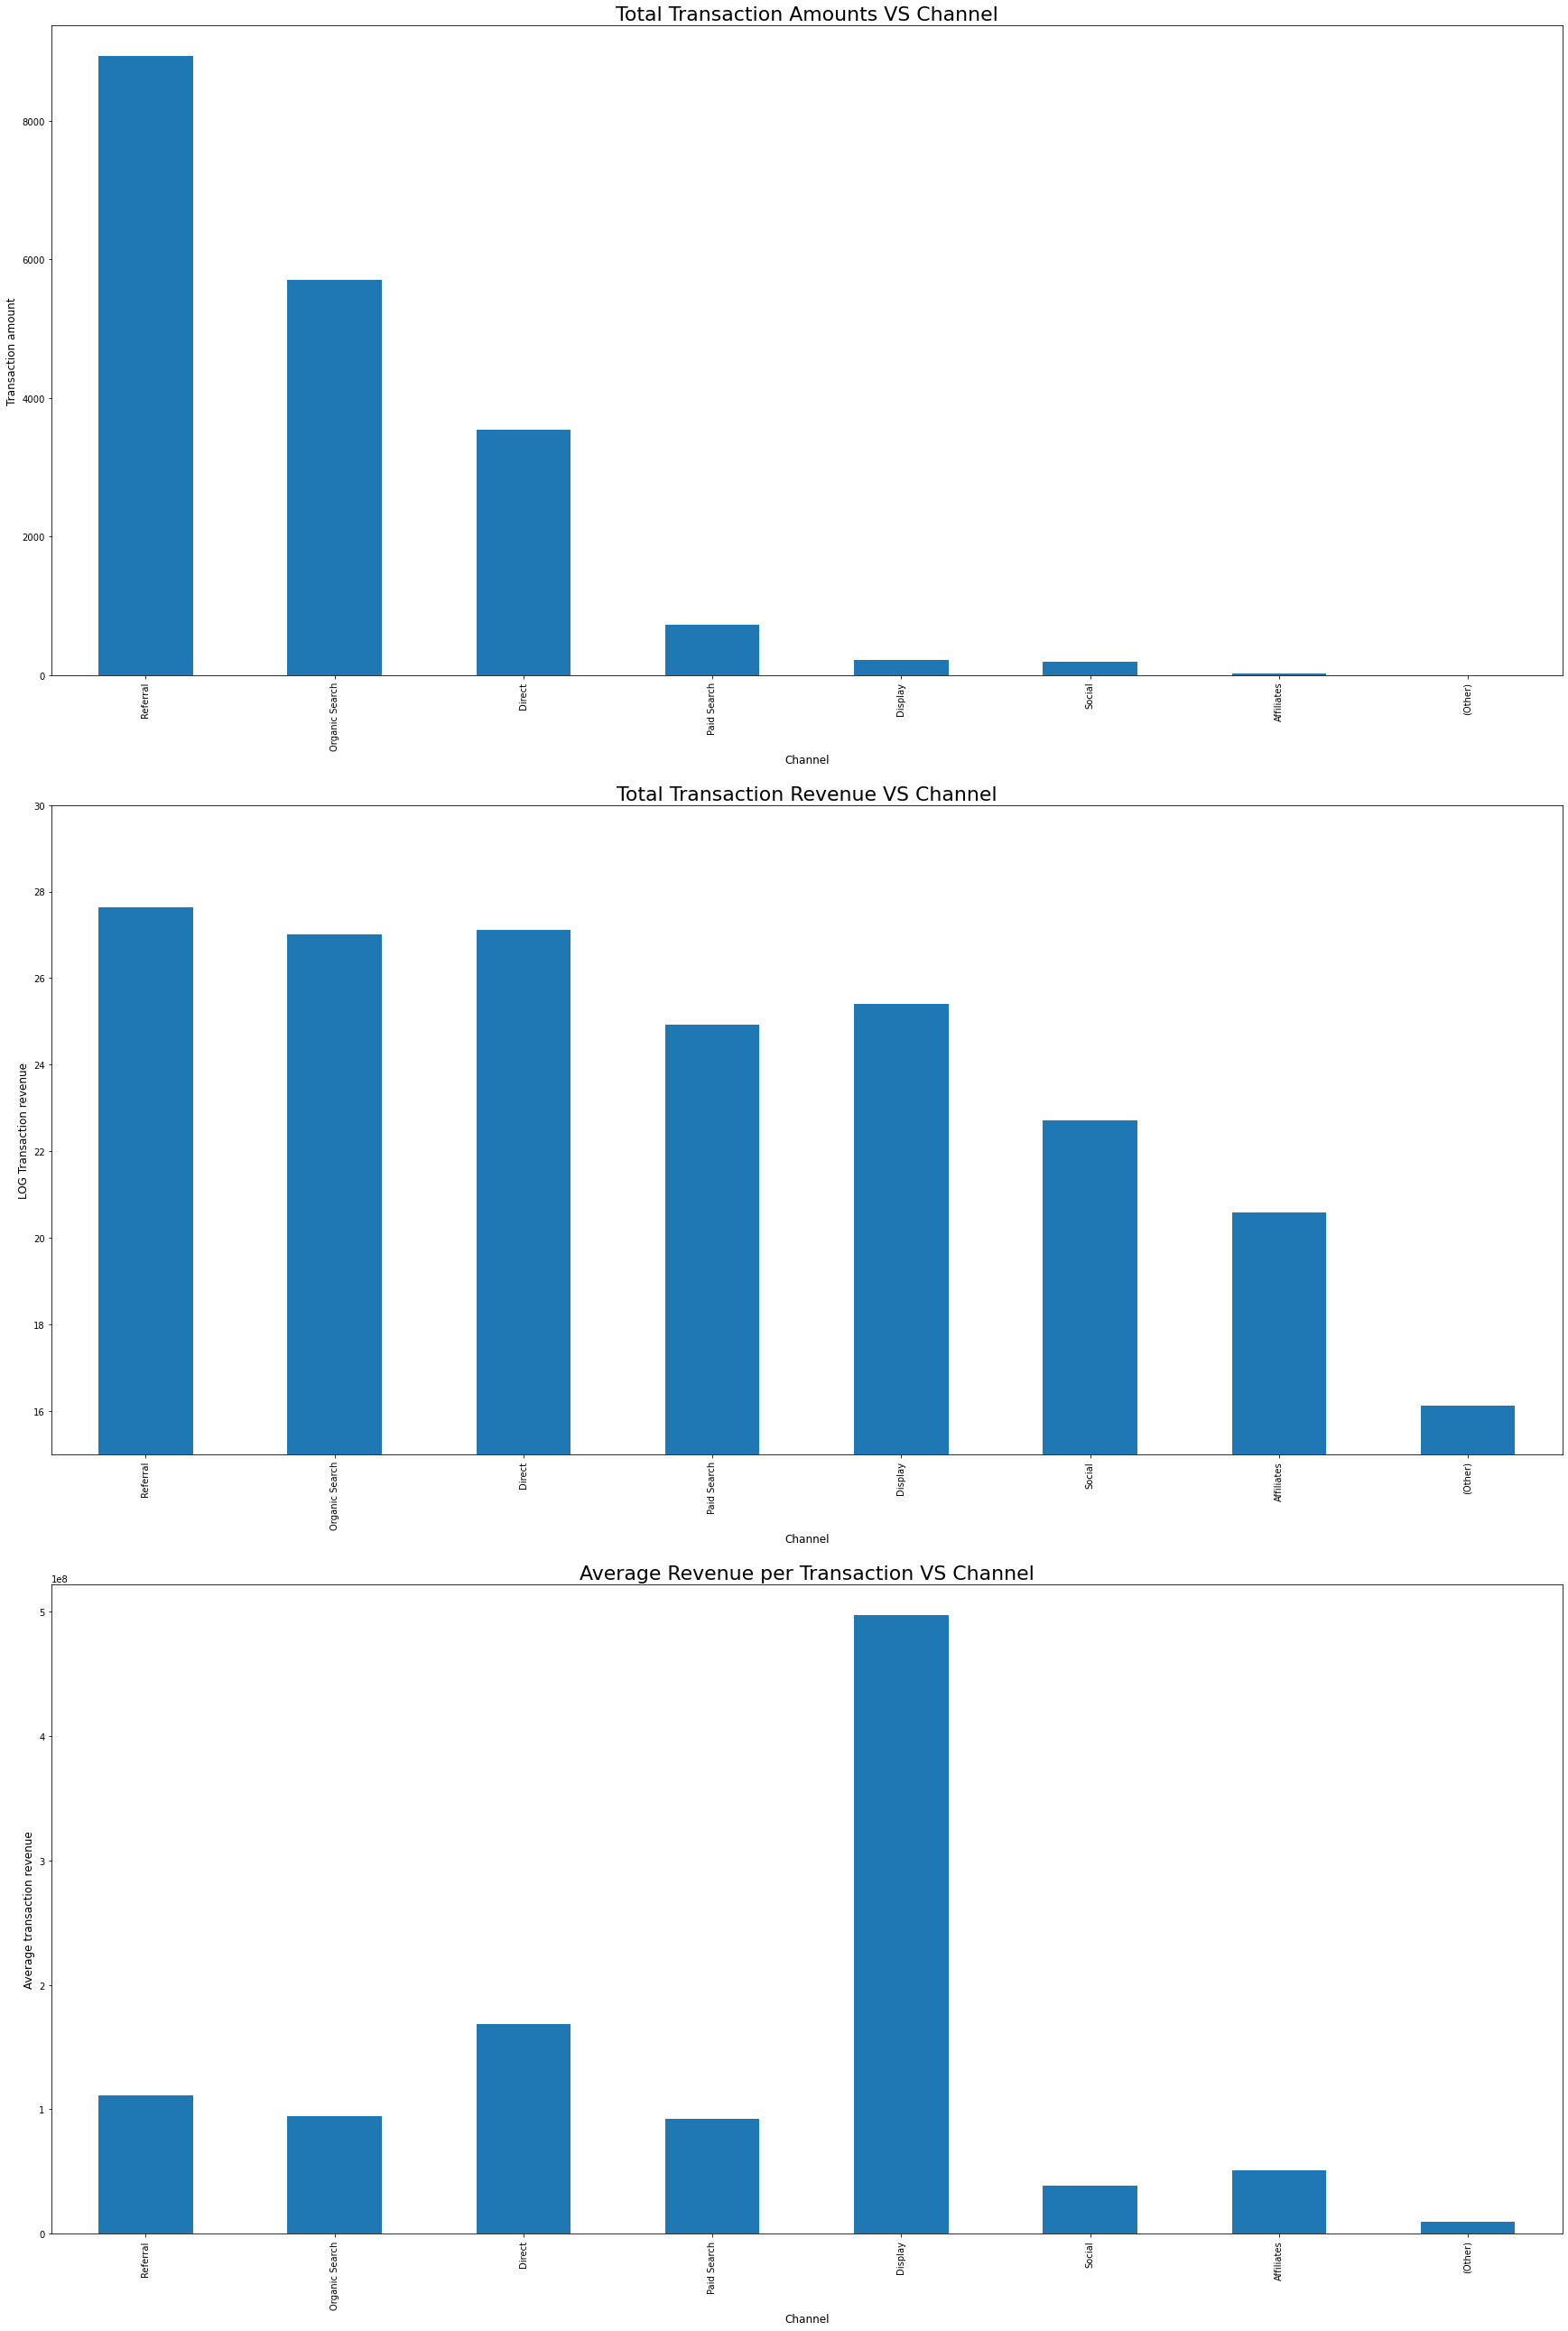

In [ ]:
m = channel.sort_values(by='transaction amount',ascending=False)[:10]
plt.subplots(figsize=(30,45))

plt.subplot(3,1,3)
m.set_index('channelGrouping')['average transaction revenue'].plot(kind='bar')
plt.title('Average Revenue per Transaction VS Channel',fontsize=22)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('Average transaction revenue',fontsize=12)

plt.subplot(3,1,2)
np.log(m.set_index('channelGrouping')['transaction revenue']).plot(kind='bar')
plt.ylim(15,30)
plt.title('Total Transaction Revenue VS Channel',fontsize=22)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('LOG Transaction revenue',fontsize=12)

plt.subplot(3,1,1)
m.set_index('channelGrouping')['transaction amount'].plot(kind='bar')
plt.title('Total Transaction Amounts VS Channel',fontsize=22)
plt.xlabel('Channel',fontsize=12)
plt.ylabel('Transaction amount',fontsize=12)

## 2.6 Revenue vs Country + City

In [ ]:
country = train_copy[['geoNetwork.country','totals.transactionRevenue']].\
groupby(['geoNetwork.country']).agg(['sum']).reset_index()

country.columns=['countries','transaction revenue']
country['revenue contribution'] = round(country['transaction revenue']/sum(country['transaction revenue'])*100,2)
country = country.sort_values(by='revenue contribution',ascending=False)[:5]
country

,countries,transaction revenue,revenue contribution
218,United States,2.197885e+12,94.89
36,Canada,4.269923e+10,1.84
222,Venezuela,1.390126e+10,0.60
102,Japan,7.361500e+09,0.32
12,Australia,6.585640e+09,0.28


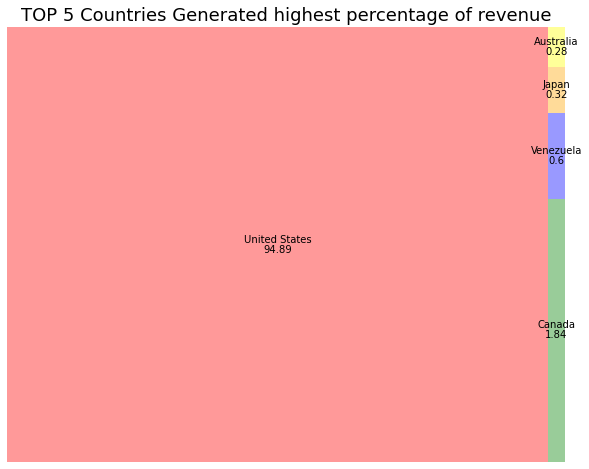

In [ ]:
import squarify
import random

color_option = ['red', 'green', 'blue', 'orange','yellow']
                
plt.figure(figsize=(10,8))
g = squarify.plot(sizes=country['revenue contribution'].values, label=country['countries'].values, 
                  value=country['revenue contribution'].values,alpha=.4, color=color_option)
g.set_title("TOP 5 Countries Generated highest percentage of revenue",fontsize=18)
g.set_axis_off()
plt.show()

In [ ]:
train_copy.columns

Index(['channelGrouping', 'customDimensions', 'date', 'fullVisitorId', 'hits',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.operatingSystem', 'device.isMobile', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'totals.hits', 'totals.pageviews',
       'totals.bounces', 'totals.newVisits', 'totals.timeOnSite',
       'totals.transactions', 'totals.transactionRevenue',
       'totals.totalTransactionRevenue', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium',
       'revenue_generation_status'],
      dtype='object')

In [ ]:
city = train_copy[train_copy['geoNetwork.country']=='United States']
city = city[['geoNetwork.city','totals.transactionRevenue']].\
groupby(['geoNetwork.city']).agg(['sum']).reset_index()

city.columns=['cities','transaction revenue']
city['revenue contribution'] = round(city['transaction revenue']/sum(city['transaction revenue'])*100,2)
city = city.sort_values(by='revenue contribution',ascending=False)[1:11]
city

,cities,transaction revenue,revenue contribution
218,New York,3.235218e+11,14.72
209,Mountain View,2.026240e+11,9.22
289,San Francisco,1.419854e+11,6.46
70,Chicago,1.102456e+11,5.02
173,Los Angeles,7.857485e+10,3.58
319,Sunnyvale,6.892402e+10,3.14
9,Ann Arbor,3.723142e+10,1.69
17,Austin,3.676502e+10,1.67
303,Seattle,3.579425e+10,1.63
55,Cambridge,3.320940e+10,1.51


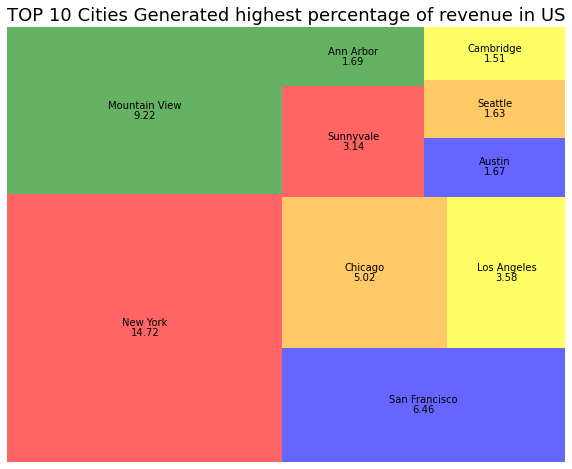

In [ ]:
color_option = ['red', 'green', 'blue', 'orange','yellow']
                
plt.figure(figsize=(10,8))
g = squarify.plot(sizes=city['revenue contribution'].values, label=city['cities'].values, 
                  value=city['revenue contribution'].values,alpha=.6, color=color_option)
g.set_title("TOP 10 Cities Generated highest percentage of revenue in US",fontsize=18)
g.set_axis_off()
plt.show()